# Cell2Cell Group Assignment
*Class*: Marketing Analytics (EWMBA263 -1)  
*Team*: Albert Deng, Peter Pang, Alex Im, and DJ Prahladka

## 0. Data Initialization

Initialize CSV data

In [142]:
import pandas
import shared.mba263 as mba263
import matplotlib.pyplot as plt
import numpy as np

data = pandas.read_csv('shared/cell2cell.csv')
data.head(10)

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,0,NaN,57.492500,482.75,37.424999,0.2475,22.75,0.000000,...,0,0,1,0,0,5,0,0,149.989990,0
1,1000006,0,0,NaN,82.275002,1312.25,75.000000,1.2375,0.00,0.000000,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,0,NaN,31.662500,25.50,29.990000,0.2475,0.00,0.000000,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,0,NaN,62.127499,97.50,65.985001,2.4750,0.00,0.000000,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,0,NaN,25.225000,2.50,25.000000,0.0000,0.00,0.000000,...,0,1,0,0,0,7,0,0,29.989990,0
5,1000015,0,0,NaN,212.515000,1971.50,84.989998,2.2275,249.50,35.497501,...,0,1,0,0,0,3,0,0,79.989990,0
6,1000016,0,0,NaN,42.564999,270.50,37.480000,0.2475,6.00,0.000000,...,0,0,1,0,0,1,0,0,29.989990,0
7,1000018,0,0,NaN,35.590000,153.00,29.990000,0.0000,16.00,0.000000,...,0,0,1,0,0,4,0,0,199.989990,0
8,1000019,0,0,NaN,55.270000,1212.75,49.990002,0.7425,0.00,1.285000,...,0,0,1,0,0,3,0,0,9.989998,0
9,1000020,0,0,NaN,50.965000,162.00,69.989998,0.0000,2.50,0.000000,...,0,1,0,0,0,1,0,0,9.989998,0


Read in variable documentation

In [143]:
# Read supplementation documentation and statistics about each variable
docs = pandas.read_excel('Cell2Cell_Data_Documentation.xlsx', sheet_name='Sheet1', usecols='A:B,D:I', skiprows=range(0, 5), header=0)
docs.head()

,Position,Variable Name,Variable Descriptiion,N,Minimum,Maximum,Mean,Standard Deviation
0,1,customer,Customer ID,71047,1.000001e+06,1099999.00,1.050487e+06,29199.114811
1,2,calibrat,Calibration sample = 1; Validation sample = 0;,71047,0.000000e+00,1.00,5.630076e-01,0.496018
2,3,churn,Churn between 31-60 days after obs_date,71047,0.000000e+00,1.00,2.900756e-01,0.453800
3,4,churndep,Churn (=missing for validation sample),40000,0.000000e+00,1.00,5.000000e-01,0.500006
4,5,revenue,Mean monthly revenue,70831,-6.167500e+00,1223.38,5.885280e+01,44.243583


## 1. Data Selection and Analysis
### a) Variable Definition

In [144]:
def classify_variables(variables):
    continuous = []
    decile = []
    indicator = []

    for variable in variables:
        if data[variable].max() == 1 and data[variable].min() == 0:
            indicator.append(variable)
        elif data[variable].max() == 9 and data[variable].min() == 0:
            decile.append(variable)
        else:
            continuous.append(variable)
    return continuous, decile, indicator

all_variables = ['revenue','mou','recchrge','directas','overage','roam','changem','changer','dropvce','blckvce','unansvce','custcare','threeway','mourec','outcalls','incalls','peakvce','opeakvce','dropblk','callfwdv','callwait','months','uniqsubs','actvsubs','phones','models','eqpdays','age1','age2','children','credita','creditaa','prizmrur','prizmub','prizmtwn','refurb','webcap','truck','rv','occprof','occcler','occcrft','occstud','occhmkr','occret','occself','ownrent','marryun','marryyes','mailord','mailres','mailflag','travel','pcown','creditcd','retcalls','retaccpt','newcelly','newcelln','refer','incmiss','income','mcycle','setprcm','setprc','retcall']

# Drop perfectly correlated variables
# Drop 

# Classify variable types
continuous_variables, decile_variables, indicator_variables = classify_variables(all_variables)

### b) Exploratory Data Analysis
Define functions to classify whether a variable has a significant difference in predicting churn

In [145]:
# Define a function that checks whether the distribution of a variable is significantly different between two groups
def is_indicator_significant(dataset, predict, variable, threshold):
    chi2, p = mba263.chi2(dataset[predict], dataset[variable])
    # Return whether the p-value is below the threshold
    return p < threshold

def sort_indicators_by_p(dataset, predict, variables):
    p_values = []
    for variable in variables:
        p = mba263.chi2(dataset[predict], dataset[variable])[1]
        p_values.append(p)
    return pandas.DataFrame({'variable': variables, 'p': p_values}).sort_values('p')['variable'].values

In [146]:
test = data.loc[data['calibrat'] == 1]

# Filter the indicator_variables list to only include significant variables
sig_indicator_variables = [variable for variable in indicator_variables 
                           if is_indicator_significant(test, 'churndep', variable, 0.03)]
sig_indicator_variables = sort_indicators_by_p(test, 'churndep', sig_indicator_variables)
print(sig_indicator_variables)

['retcall' 'webcap' 'creditaa' 'setprcm' 'refurb' 'mailres' 'mailord'
 'marryun' 'credita' 'incmiss' 'ownrent' 'creditcd' 'newcelly' 'prizmtwn']


In [147]:
test.groupby('newcelly')['churn'].mean()

newcelly
0    0.503315
1    0.486147
Name: churn, dtype: float64

### c) Variable Selection

In [148]:
# Append sig_indicator_variables, decile_variables, and continuous variables together
selected_variables = np.concatenate((sig_indicator_variables, decile_variables, continuous_variables), axis=None)

## 2. Run analyses
### a) Build model
Define helper functions to calculate lift and identify the probability threshold

In [149]:
# Create a custom scoring function to calculate lift
def calculate_lift(dataset, predict, actual, threshold):
   # Calculate the average churn based on where the predict column's value is greater than the threshold
   pred_rate = dataset[dataset[predict] > threshold][actual].mean()
   actual_rate = dataset[actual].mean()
   return (pred_rate / actual_rate)*100

# Define a function that finds the probability where the lift is greater than a target
def find_prob_threshold(dataset, predict, actual, target):
    thresholds = np.linspace(0, 1, 100)
    df = dataset[[predict, actual]]
    for threshold in thresholds:
        df['pred'] = np.where(df[predict] > threshold, 1, 0)
        if calculate_lift(df, 'pred', actual, threshold) >= target:
            return threshold

Run a standard linear regression and identify what probability threshold is needed to come up with the 170 target lift.

In [150]:
### A function to run a logistic regression, a logistic regression w/ regularization, 
### a neural network, and a random forest
### Function adds two columns, p for probability and res if selected for targeting
def run_ml_models(dataset, actual, variables, target):
    df = dataset.copy()

    # Split dataset into train and test based on whether calibrat = 0 or 1
    train, test = data[data['calibrat'] == 1], data[data['calibrat'] == 0]

    ### Use a regular logistic regression
    ### ------------------------------------------------
    result_logit = mba263.logit(train[actual], train[variables])

    train['p_log'] = result_logit.predict(train[variables])
    test['p_log'] = result_logit.predict(test[variables])

    train_threshold = find_prob_threshold(train, 'p_log', actual, target)
    test_threshold = find_prob_threshold(test, 'p_log', actual, target)

    train['res_log'] = np.where(train['p_log'] > train_threshold, 1, 0)
    test['res_log'] = np.where(test['p_log'] > test_threshold, 1, 0)

    # Rename churn to actuals
    train['actual_res'] = train['churn']
    test['actual_res'] = test['churn']

    # Return three items, the results on the test dataset, the results on the training, the models, and thresholds
    return [test[['customer', 'p_log','actual_res', 'res_log']],
            train[['customer', 'p_log','actual_res', 'res_log']], 
               [result_logit],
               [train_threshold, test_threshold]]

Tune and run the logistic regression based on the dataset

In [151]:
predictions, actuals, model, thresholds = run_ml_models(data, "churn", all_variables, 170)

Optimization terminated successfully.
         Current function value: 0.671533
         Iterations 5


## 3. Evaluation
### a) Evaluate model characteristics
Print parameters, coefficients, and odds for the resulting model

In [152]:
from IPython.display import display

# Print the coefficients for the logistic regressions
def print_coefs(models):
    display(models[0].summary())

print("Train threshold: {0:.2f}".format(thresholds[0]))
print("Test threshold: {0:.2f}".format(thresholds[1]))
print_coefs(model)

Train threshold: 0.91
Test threshold: 0.58


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                  churn   No. Observations:                38941
Model:                    Mba263Logit   Df Residuals:                    38874
Method:                           MLE   Df Model:                           66
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                 0.03117
Time:                        20:42:50   Log-Likelihood:                -26150.
converged:                       True   LL-Null:                       -26992.
Covariance Type:            nonrobust   LLR p-value:                6.012e-308
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1497      0.095      1.571      0.116      -0.037       0.336
revenue        0.0020      0.001      2.460      0.014       0.000       0.004
mou           -0.0003   4.96e-05     -5.657      0.000      -0.000      -0.000
recchrge      -0.0031      0.001     -3.513      0.000      -0.005      -0.001
directas      -0.0012      0.006     -0.201      0.840      -0.013       0.010
overage        0.0008      0.000      2.711      0.007       0.000       0.001
roam           0.0071      0.002      3.436      0.001       0.003       0.011
changem       -0.0005   5.35e-05     -9.194      0.000      -0.001      -0.000
changer        0.0023      0.000      6.247      0.000       0.002       0.003
dropvce        0.0113      0.007      1.563      0.118      -0.003       0.026
blckvce        0.0064      0.007      0.895      0.371      -0.008       0.020
unansvce       0.0009      0.000      2.058      0.040    4.38e-05       0.002
custcare      -0.0060      0.003     -2.331      0.020      -0.011      -0.001
threeway      -0.0303      0.011     -2.691      0.007      -0.052      -0.008
mourec         0.0001      0.000      1.018      0.309      -0.000       0.000
outcalls       0.0011      0.001      1.894      0.058   -3.87e-05       0.002
incalls       -0.0031      0.001     -2.937      0.003      -0.005      -0.001
peakvce       -0.0007      0.000     -3.058      0.002      -0.001      -0.000
opeakvce      -0.0002      0.000     -0.783      0.434      -0.001       0.000
dropblk       -0.0031      0.007     -0.442      0.658      -0.017       0.011
callfwdv      -0.0026      0.023     -0.114      0.909      -0.048       0.043
callwait       0.0021      0.003      0.664      0.507      -0.004       0.008
months        -0.0213      0.002    -10.652      0.000      -0.025      -0.017
uniqsubs       0.1844      0.020      9.225      0.000       0.145       0.224
actvsubs      -0.2057      0.028     -7.372      0.000      -0.260      -0.151
phones         0.0487      0.018      2.678      0.007       0.013       0.084
models         0.0138      0.028      0.495      0.621      -0.041       0.068
eqpdays        0.0014   7.47e-05     19.309      0.000       0.001       0.002
age1          -0.0033      0.001     -3.787      0.000      -0.005      -0.002
age2          -0.0012      0.001     -1.718      0.086      -0.003       0.000
children       0.0946      0.028      3.359      0.001       0.039       0.150
credita       -0.1781      0.036     -5.016      0.000      -0.248      -0.108
creditaa      -0.3626      0.035    -10.488      0.000      -0.430      -0.295
prizmrur       0.0665      0.050      1.342      0.180      -0.031       0.164
prizmub       -0.0396      0.024     -1.624      0.104      -0.087       0.008
prizmtwn       0.0462      0.031      1.470      0.142      -0.015       0.108
refurb         0.2340      0.032      7.323      0.000       0.171       0.297
webcap        -0.1561      0.038     -4.157      0.000      -0.230      -0.083
tr

### b) Analyze Lift
Begin by subdividing results into 100 n-tiles and identifying the point where the average lift becomes 170.

In [153]:
lift_ntiles = mba263.lift(predictions['actual_res'], predictions['p_log'], 100)
max_tile = 0
sum = 0

for i in range(0, 100):
    sum += lift_ntiles[i]
    if sum / (i + 1) > 170:
        max_tile = i
    else: 
        break

print("The maximum tile is: {}".format(max_tile))


The maximum tile is: 38


Draw a lift chart with a red line indicating where we draw the line to select persons predicted for churn.

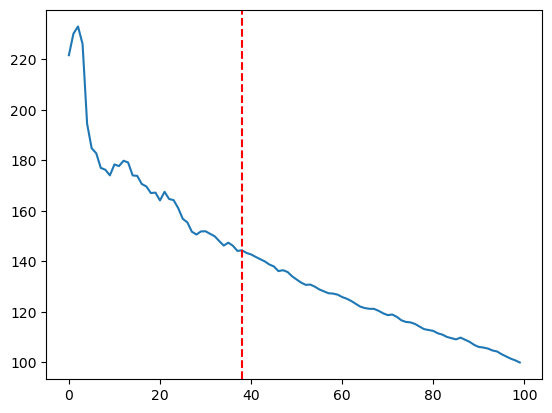

In [154]:
plt.plot(mba263.lift(predictions['actual_res'], predictions['p_log'], 100))
plt.axvline(x=max_tile, color='red', linestyle='--')

### c) Model Analysis
Review the economic importance of each predictor variable. Start with the odds ratios.

In [155]:
# Print the odds ratios for each logistic regression
def print_odds(models):
    display(mba263.odds_ratios(models[0]))

print_odds(model)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
revenue,1.001965,0.000800,2.457744,0.014,1.000414,1.003517
mou,0.999719,0.000050,5.657881,0.000,0.999623,0.999815
recchrge,0.996882,0.000886,3.518808,0.000,0.995164,0.998601
directas,0.998805,0.005932,0.201471,0.840,0.987298,1.010312
overage,1.000761,0.000281,2.710145,0.007,1.000216,1.001305
roam,1.007116,0.002078,3.424242,0.001,1.003085,1.011148
changem,0.999508,0.000053,9.196371,0.000,0.999404,0.999612
changer,1.002306,0.000370,6.239374,0.000,1.001589,1.003023
dropvce,1.011402,0.007337,1.554203,0.120,0.997170,1.025635
blckvce,1.006423,0.007203,0.891658,0.373,0.992448,1.020398


Normalize them against each variable's standard deviation

In [156]:
# Avoid truncation
pandas.set_option('display.max_rows', None)

# Retrieve odds and standard deviations
odds = mba263.odds_ratios(model[0])
x_std = docs[['Variable Name', 'Standard Deviation']]

# Join odds ratios against standard deviations
joined = odds.merge(x_std, left_index=True, right_on='Variable Name')

# Calculate normalized odds
joined['norm_odds'] = np.power(joined['Odds ratios'], joined['Standard Deviation'])

# Calculate magnitude (reverse direction for negative odds)
joined['mag_odds'] = joined['norm_odds']

# set mag_odds to 1/mag_odds if norm_odds is less than 1
joined.loc[joined['mag_odds'] < 1, 'mag_odds'] = 1 / joined['norm_odds']
joined = joined.sort_values('mag_odds', ascending=False)

joined[['Variable Name', 'mag_odds']]

,Variable Name,mag_odds
30,eqpdays,1.442839
26,uniqsubs,1.232051
25,months,1.231607
5,mou,1.160552
69,retcall,1.154781
27,actvsubs,1.145435
10,changem,1.133826
35,creditaa,1.129021
12,dropvce,1.107506
11,changer,1.093412
